In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
data=pd.read_csv("CollegePlacement.csv")
print(f"shape ={data.shape} \nsize={data.size}")
data.head()

shape =(10000, 10) 
size=100000


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
le=LabelEncoder()
ohe=OneHotEncoder(sparse_output=False)
data["Placement"] = le.fit_transform(data["Placement"])
new_metric = ohe.fit_transform(data[["Internship_Experience"]])
data["Internship_Experience"] = [int(i) for _,i in new_metric]
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [5]:
x=data.iloc[:,1:-1]
y=data.iloc[:,[-1]]

# UP sampling the data set

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x,y)

C:\Users\updes\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


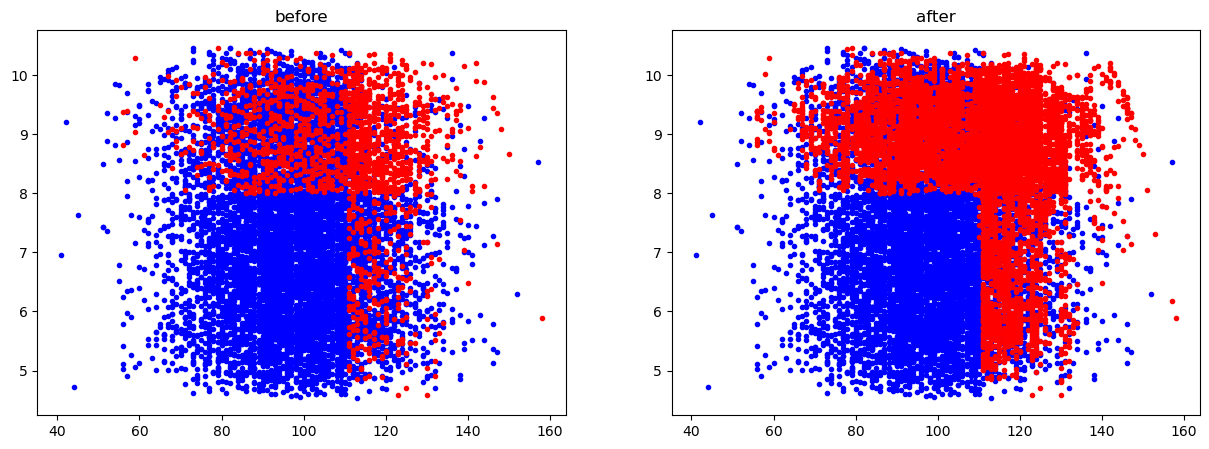

In [7]:
smoth_df = pd.concat([x_smote, y_smote], axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.scatter(x=x[data["Placement"]==0]["IQ"],y=x[data["Placement"]==0]["CGPA"],marker=".",c="b")
ax1.scatter(x=x[data["Placement"]==1]["IQ"],y=x[data["Placement"]==1]["CGPA"],marker=".",c="r")
ax1.set_title("before")

ax2.scatter(x=x_smote[smoth_df["Placement"] == 0]["IQ"], y=x_smote[smoth_df["Placement"] == 0]["CGPA"], marker=".", c="b")
ax2.scatter(x=x_smote[smoth_df["Placement"] == 1]["IQ"], y=x_smote[smoth_df["Placement"] == 1]["CGPA"], marker=".", c="r")
ax2.set_title("after")

plt.show()

In [8]:
x_smote.shape,x.shape

((16682, 8), (10000, 8))

In [9]:
y_smote.shape,y.shape

((16682, 1), (10000, 1))

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x_smote,y_smote,test_size=0.3,shuffle=True,random_state=42)

print(f"xtrain shape ={xtrain.shape}")
print(f"ytest shape ={ytest.shape}")

xtrain shape =(11677, 8)
ytest shape =(5005, 1)


# scaling the columns 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

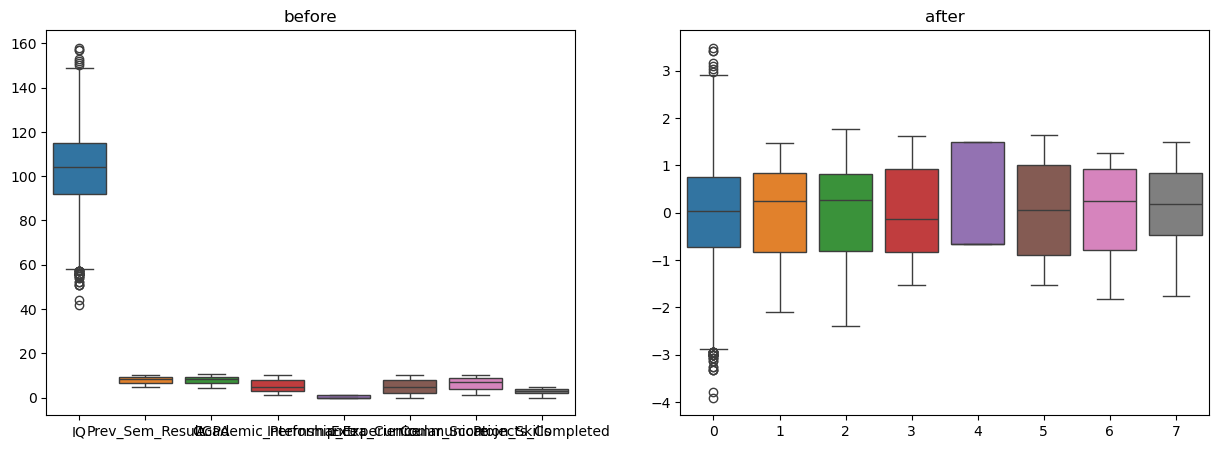

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("before")
sns.boxplot(xtrain,ax=ax1)

ax2.set_title("after")
sns.boxplot(xtrain_scaled,ax=ax2)

plt.show()

# Traning three models 
* SVM(Linear)
* KNN
* Navebias

In [13]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain_scaled,ytrain)

C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [14]:
svc.score(xtest_scaled,ytest)

0.9534465534465535

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
knn.fit(xtrain_scaled,ytrain)

C:\Users\updes\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.score(xtest_scaled,ytest)

0.9466533466533467

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_scaled,ytrain)

C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [18]:
gnb.score(xtest_scaled,ytest)

0.8287712287712288

# SVM perform the best among all the models

<Axes: title={'center': 'Model Performance'}>

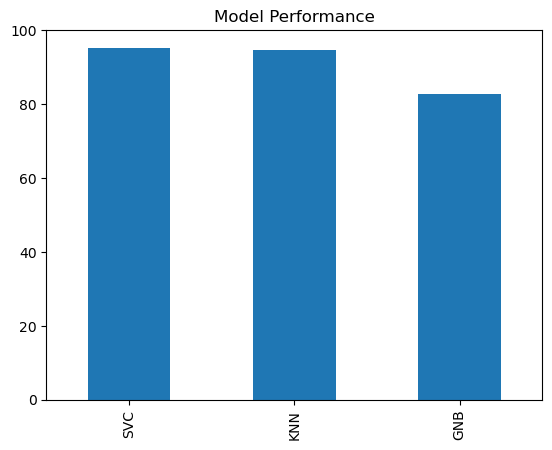

In [19]:
pd.DataFrame([95.3,94.6,82.8],index=["SVC","KNN","GNB"]).plot(kind="bar",title="Model Performance",legend=False)

# useing grid search CV to find best parameter

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid=[{
    "C":[0.01,1,10,100],"kernel":["linear","sigmoid","rbf"]
}]

In [22]:
from sklearn.svm import SVC
svc = SVC()
grid_search=GridSearchCV(svc,param_grid,cv=3,scoring="accuracy",return_train_score=True,verbose=10)

In [23]:
grid_search.fit(xtrain_scaled,ytrain)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.01, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 1/12] END C=0.01, kernel=linear;, score=(train=0.853, test=0.852) total time=   0.8s
[CV 2/3; 1/12] START C=0.01, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 1/12] END C=0.01, kernel=linear;, score=(train=0.856, test=0.848) total time=   0.8s
[CV 3/3; 1/12] START C=0.01, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 1/12] END C=0.01, kernel=linear;, score=(train=0.851, test=0.859) total time=   0.8s
[CV 1/3; 2/12] START C=0.01, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 2/12] END C=0.01, kernel=sigmoid;, score=(train=0.833, test=0.831) total time=   1.7s
[CV 2/3; 2/12] START C=0.01, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 2/12] END C=0.01, kernel=sigmoid;, score=(train=0.834, test=0.828) total time=   1.7s
[CV 3/3; 2/12] START C=0.01, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 2/12] END C=0.01, kernel=sigmoid;, score=(train=0.829, test=0.836) total time=   1.7s
[CV 1/3; 3/12] START C=0.01, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 3/12] END C=0.01, kernel=rbf;, score=(train=0.880, test=0.881) total time=   3.1s
[CV 2/3; 3/12] START C=0.01, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 3/12] END C=0.01, kernel=rbf;, score=(train=0.886, test=0.880) total time=   3.1s
[CV 3/3; 3/12] START C=0.01, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 3/12] END C=0.01, kernel=rbf;, score=(train=0.881, test=0.885) total time=   3.2s
[CV 1/3; 4/12] START C=1, kernel=linear.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 4/12] END C=1, kernel=linear;, score=(train=0.851, test=0.853) total time=   1.0s
[CV 2/3; 4/12] START C=1, kernel=linear.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 4/12] END C=1, kernel=linear;, score=(train=0.856, test=0.848) total time=   1.0s
[CV 3/3; 4/12] START C=1, kernel=linear.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 4/12] END C=1, kernel=linear;, score=(train=0.852, test=0.857) total time=   1.0s
[CV 1/3; 5/12] START C=1, kernel=sigmoid........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 5/12] END C=1, kernel=sigmoid;, score=(train=0.711, test=0.700) total time=   0.9s
[CV 2/3; 5/12] START C=1, kernel=sigmoid........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 5/12] END C=1, kernel=sigmoid;, score=(train=0.716, test=0.708) total time=   0.9s
[CV 3/3; 5/12] START C=1, kernel=sigmoid........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 5/12] END C=1, kernel=sigmoid;, score=(train=0.700, test=0.723) total time=   1.0s
[CV 1/3; 6/12] START C=1, kernel=rbf............................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 6/12] END C=1, kernel=rbf;, score=(train=0.957, test=0.953) total time=   1.0s
[CV 2/3; 6/12] START C=1, kernel=rbf............................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 6/12] END C=1, kernel=rbf;, score=(train=0.954, test=0.953) total time=   1.0s
[CV 3/3; 6/12] START C=1, kernel=rbf............................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 6/12] END C=1, kernel=rbf;, score=(train=0.955, test=0.950) total time=   1.0s
[CV 1/3; 7/12] START C=10, kernel=linear........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 7/12] END C=10, kernel=linear;, score=(train=0.851, test=0.853) total time=   2.2s
[CV 2/3; 7/12] START C=10, kernel=linear........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 7/12] END C=10, kernel=linear;, score=(train=0.856, test=0.849) total time=   2.2s
[CV 3/3; 7/12] START C=10, kernel=linear........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 7/12] END C=10, kernel=linear;, score=(train=0.852, test=0.857) total time=   2.3s
[CV 1/3; 8/12] START C=10, kernel=sigmoid.......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 8/12] END C=10, kernel=sigmoid;, score=(train=0.707, test=0.697) total time=   0.9s
[CV 2/3; 8/12] START C=10, kernel=sigmoid.......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 8/12] END C=10, kernel=sigmoid;, score=(train=0.711, test=0.703) total time=   0.9s
[CV 3/3; 8/12] START C=10, kernel=sigmoid.......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 8/12] END C=10, kernel=sigmoid;, score=(train=0.697, test=0.720) total time=   0.9s
[CV 1/3; 9/12] START C=10, kernel=rbf...........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 9/12] END C=10, kernel=rbf;, score=(train=0.981, test=0.971) total time=   0.7s
[CV 2/3; 9/12] START C=10, kernel=rbf...........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 9/12] END C=10, kernel=rbf;, score=(train=0.981, test=0.970) total time=   0.7s
[CV 3/3; 9/12] START C=10, kernel=rbf...........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 9/12] END C=10, kernel=rbf;, score=(train=0.980, test=0.971) total time=   0.7s
[CV 1/3; 10/12] START C=100, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 10/12] END C=100, kernel=linear;, score=(train=0.851, test=0.852) total time=   9.4s
[CV 2/3; 10/12] START C=100, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 10/12] END C=100, kernel=linear;, score=(train=0.856, test=0.848) total time=   9.1s
[CV 3/3; 10/12] START C=100, kernel=linear......................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 10/12] END C=100, kernel=linear;, score=(train=0.852, test=0.857) total time=  10.2s
[CV 1/3; 11/12] START C=100, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 11/12] END C=100, kernel=sigmoid;, score=(train=0.705, test=0.696) total time=   0.9s
[CV 2/3; 11/12] START C=100, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 11/12] END C=100, kernel=sigmoid;, score=(train=0.712, test=0.703) total time=   0.9s
[CV 3/3; 11/12] START C=100, kernel=sigmoid.....................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 11/12] END C=100, kernel=sigmoid;, score=(train=0.697, test=0.720) total time=   0.9s
[CV 1/3; 12/12] START C=100, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3; 12/12] END C=100, kernel=rbf;, score=(train=0.994, test=0.979) total time=   0.7s
[CV 2/3; 12/12] START C=100, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3; 12/12] END C=100, kernel=rbf;, score=(train=0.994, test=0.977) total time=   0.6s
[CV 3/3; 12/12] START C=100, kernel=rbf.........................................


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3; 12/12] END C=100, kernel=rbf;, score=(train=0.994, test=0.983) total time=   0.7s


C:\Users\updes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 10, 100],
                          'kernel': ['linear', 'sigmoid', 'rbf']}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [24]:
best_model = grid_search.best_estimator_
best_model

SVC(C=100)

In [25]:
best_model.score(xtest_scaled,ytest)

0.984015984015984

In [27]:
results = grid_search.cv_results_
# Create a DataFrame for better readability
df_results = pd.DataFrame(results)

# Display relevant columns
print(df_results[['params', 'mean_test_score', 'rank_test_score']])

                              params  mean_test_score  rank_test_score
0    {'C': 0.01, 'kernel': 'linear'}         0.853130                5
1   {'C': 0.01, 'kernel': 'sigmoid'}         0.831806                9
2       {'C': 0.01, 'kernel': 'rbf'}         0.882076                4
3       {'C': 1, 'kernel': 'linear'}         0.852873                7
4      {'C': 1, 'kernel': 'sigmoid'}         0.710286               10
5          {'C': 1, 'kernel': 'rbf'}         0.952128                3
6      {'C': 10, 'kernel': 'linear'}         0.852873                6
7     {'C': 10, 'kernel': 'sigmoid'}         0.706604               11
8         {'C': 10, 'kernel': 'rbf'}         0.970540                2
9     {'C': 100, 'kernel': 'linear'}         0.852702                8
10   {'C': 100, 'kernel': 'sigmoid'}         0.706175               12
11       {'C': 100, 'kernel': 'rbf'}         0.979618                1


<Axes: title={'center': 'Model Performance'}>

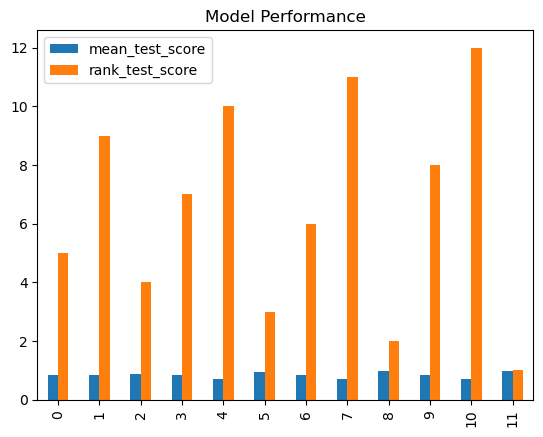

In [31]:
df_results[['params', 'mean_test_score', 'rank_test_score']].plot(kind="bar",title="Model Performance")

In [32]:
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(ytest, best_model.predict(xtest_scaled),labels=[1,0])

print('Classification report of non scaled model : \n',matrix)

Classification report of non scaled model : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98      2461
           0       0.99      0.98      0.98      2544

    accuracy                           0.98      5005
   macro avg       0.98      0.98      0.98      5005
weighted avg       0.98      0.98      0.98      5005

